In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

# ***Converting .xlsx file to .csv file***

In [2]:
'''file_path = "dataset/Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

df.to_csv("dataset/Telco_customer_churn.csv", index=False)'''

'file_path = "dataset/Telco_customer_churn.xlsx"\ndf = pd.read_excel(file_path)\n\ndf.to_csv("dataset/Telco_customer_churn.csv", index=False)'

# ***Reading CSV file***

In [3]:
data = pd.read_csv("dataset/Telco_customer_churn.csv")

In [4]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
data.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [9]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [10]:
for single_column in data.columns:
    print("unique value in {} are: {}".format(single_column,data[single_column].unique()))

unique value in CustomerID are: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
unique value in Count are: [1]
unique value in Country are: ['United States']
unique value in State are: ['California']
unique value in City are: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
unique value in Zip Code are: [90003 90005 90006 ... 96128 96134 96146]
unique value in Lat Long are: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
unique value in Latitude are: [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
unique value in Longitude are: [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
unique value in Gender are: ['Male' 'Female']
unique value in Senior Citizen are: ['No' 'Yes']
unique value in Partner are: ['No' 'Yes']
unique value in Dependents are: ['No' 'Ye

<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn Value'>

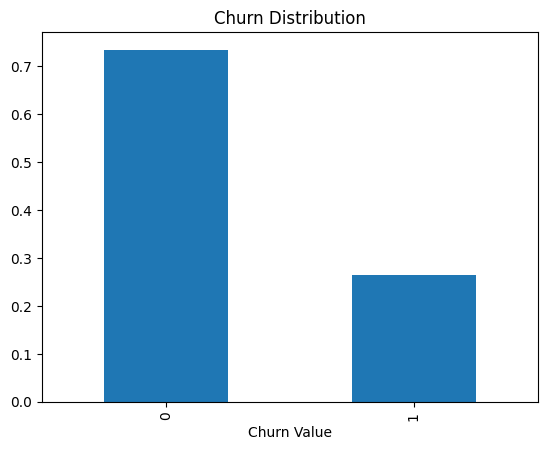

In [11]:
data['Churn Value'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')


***It shows that the target columns is baised it has high values of 0***

In [12]:
col_for_drop = [
    'CustomerID',
    'Count',
    'Country',
    'State',
    'Zip Code',
    'Lat Long',
    'Churn Label',
    'Churn Score',
    'CLTV',
    'Churn Reason',
    'City', 
    'Latitude', 
    'Longitude', 
    'Senior Citizen'
]

for col in col_for_drop:
    data.drop(labels=[col],axis=1, inplace= True)


In [13]:
col_with_yes_no = []

for col in data.columns:
    unique_vals = set(data[col].astype(str).str.lower().unique())
    if unique_vals.issubset({'yes', 'no'}):
        col_with_yes_no .append(col)


In [14]:
col_with_yes_no

['Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

In [15]:
for col in col_with_yes_no:
    data[col] = data[col].str.lower().map({"yes": 1, "no": 0})


In [16]:
internet_service_cols = ['Online Security', 'Online Backup', 'Device Protection',
                         'Tech Support', 'Streaming TV', 'Streaming Movies']
for col in internet_service_cols:
    data[col] = data[col].replace('No internet service', 'No').map({'Yes':1, 'No':0})


In [17]:
data['Multiple Lines'] = data['Multiple Lines'].replace('No phone service', 'No').map({'Yes':1, 'No':0})

In [18]:
for single_column in data.columns:
    print("unique value in {} are: {}".format(single_column,data[single_column].unique()))

unique value in Gender are: ['Male' 'Female']
unique value in Partner are: [0 1]
unique value in Dependents are: [0 1]
unique value in Tenure Months are: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
unique value in Phone Service are: [1 0]
unique value in Multiple Lines are: [0 1]
unique value in Internet Service are: ['DSL' 'Fiber optic' 'No']
unique value in Online Security are: [1 0]
unique value in Online Backup are: [1 0]
unique value in Device Protection are: [0 1]
unique value in Tech Support are: [0 1]
unique value in Streaming TV are: [0 1]
unique value in Streaming Movies are: [0 1]
unique value in Contract are: ['Month-to-month' 'Two year' 'One year']
unique value in Paperless Billing are: [1 0]
unique value in Payment Method are: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Cred

In [19]:
data["Gender"] = data["Gender"].str.lower().map({"male":1, "female":0})

In [20]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'].str.strip(), errors='coerce')
data['Total Charges'] = data['Total Charges'].fillna(0)

In [21]:
multi_category_cols = [
    'Internet Service',
    'Contract',
    'Payment Method'
]

for col in multi_category_cols:
    data[col] = data[col].str.strip().str.lower()

data = pd.get_dummies(data, columns=multi_category_cols, drop_first=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Partner                                 7043 non-null   int64  
 2   Dependents                              7043 non-null   int64  
 3   Tenure Months                           7043 non-null   int64  
 4   Phone Service                           7043 non-null   int64  
 5   Multiple Lines                          7043 non-null   int64  
 6   Online Security                         7043 non-null   int64  
 7   Online Backup                           7043 non-null   int64  
 8   Device Protection                       7043 non-null   int64  
 9   Tech Support                            7043 non-null   int64  
 10  Streaming TV                            7043 non-null   int6

In [23]:
y =data["Churn Value"]
x = data.drop(labels=["Churn Value"],axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_test_scaled)
    print(name)
    print(classification_report(y_test, preds))


Logistic
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1009
           1       0.54      0.81      0.65       400

    accuracy                           0.75      1409
   macro avg       0.73      0.77      0.73      1409
weighted avg       0.80      0.75      0.76      1409

RandomForest
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1009
           1       0.62      0.62      0.62       400

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.78      0.78      0.78      1409

XGBoost
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1009
           1       0.63      0.61      0.62       400

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79 

In [28]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid = GridSearchCV(XGBClassifier(), param_grid=params, cv=3, scoring='f1')
grid.fit(X_train_bal, y_train_bal)
print(grid.best_params_)


{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [29]:
trained_model = XGBClassifier(
    learning_rate=0.01,
    max_depth=7,
    n_estimators=200,
    subsample=1.0,
)
trained_model.fit(X_train_bal, y_train_bal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
model_pred = trained_model.predict(X_test_scaled)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1009
           1       0.63      0.61      0.62       400

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



In [31]:
from sklearn.metrics import roc_auc_score
probas = trained_model.predict_proba(X_test_scaled)[:,1]
print(roc_auc_score(y_test, probas))


0.857509910802775


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = trained_model.feature_importances_

# If you have column names (assuming X_train is a DataFrame):
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Show top 10 features
print(importance_df.head(10))


                         Feature  Importance
18             Contract_two year    0.420537
17             Contract_one year    0.245289
15  Internet Service_fiber optic    0.047872
2                     Dependents    0.045386
11              Streaming Movies    0.041939
16           Internet Service_no    0.030573
10                  Streaming TV    0.017694
3                  Tenure Months    0.017389
12             Paperless Billing    0.016329
6                Online Security    0.015482


In [50]:
top_10_features = [
    'Contract_two year',
    'Contract_one year',
    'Internet Service_fiber optic',
    'Dependents',
    'Streaming Movies',
    'Internet Service_no',
    'Streaming TV',
    'Tenure Months',
    'Paperless Billing',
    'Online Security'
]

X_train_top = x[top_10_features]
X_test_top = x[top_10_features]

In [51]:
from sklearn.metrics import classification_report, roc_auc_score

trained_model_top = XGBClassifier(
    learning_rate=0.01,
    max_depth=7,
    n_estimators=200,
    subsample=1.0,
)

trained_model_top.fit(X_train_top, y)

preds_top = trained_model_top.predict(X_test_top)
probas_top = trained_model_top.predict_proba(X_test_top)[:, 1]

print(classification_report(y, preds_top))
print("ROC AUC Score:", roc_auc_score(y, probas_top))


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5174
           1       0.71      0.49      0.58      1869

    accuracy                           0.81      7043
   macro avg       0.77      0.71      0.73      7043
weighted avg       0.80      0.81      0.80      7043

ROC AUC Score: 0.8775773235854541


In [52]:
import pickle

# Save trained XGBoost model
with open("xgb_model_top.pkl", "wb") as f:
    pickle.dump(trained_model_top, f)

print("Model saved as xgb_model_top.pkl")


Model saved as xgb_model_top.pkl
